# IMPORTS

## Bibliotecas

In [17]:
import pandas as pd
import inflection
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from IPython.core.display import HTML

## Funções Auxiliares

In [3]:
# Função para expandir o notebook na página toda.
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Carregando Dados

In [2]:
df_sales_raw = pd.read_csv('dataset/train.csv', low_memory=False)
df_store_raw = pd.read_csv('dataset/store.csv', low_memory=False)

# merge dos df
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

In [3]:
df_raw.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
669109,895,6,2013-11-09,8375,928,1,0,0,0,a,c,4150.0,NaN,NaN,0,NaN,NaN,NaN


# PASSO 01 - DESCRIÇÃO DOS DADOS

In [4]:
# Fazendo cópia do df para essa sessão.
df_1 = df_raw.copy()

## Renomear colunas

In [5]:
df_1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [5]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType',
'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
'Promo2SinceYear', 'PromoInterval']

# Mudar o estilo das colunas para snake case.
snake_case = lambda x: inflection.underscore(x) # O método underscore() aplica o formato snake case.

cols_new = list(map(snake_case, cols_old))

# rename.
df_1.columns = cols_new

In [6]:
# Colunas no estilo snake case.
df_1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## Dimensão dos Dados

In [18]:
print(f'Número de Linhas: {df_1.shape[0]}')
print(f'Número de Colunas: {df_1.shape[1]}')

Número de Linhas: 1017209
Número de Colunas: 18


## Tipo dos Dados

In [20]:
df_1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [7]:
# Mudar o tipo da variável 'date' para data.
df_1['date'] = pd.to_datetime(df_1['date'])

df_1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## Verificar/Tratar os NA

In [8]:
# Mostrar a soma de linhas NA por coluna.
df_1.isna().sum()
# As colunas com zero significa que essas colunas não possuem NA.

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

### Preencher os NA

In [9]:
# Para executar todo os códigos de 2.4.1.1 até 2.4.1.7

# Substituindo os NA pela distância de 200000.0 metros.
df_1['competition_distance'] = df_1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)

# Sobreescrever os NA pelo mês da coluna 'date' referente as últimas vendas.
df_1['competition_open_since_month'] = df_1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)

# Sobreescrever os NA pelo ano da coluna 'date' referente as últimas vendas.
df_1['competition_open_since_year'] = df_1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)

# Se na linha que estou analisando tiver um NA na coluna 'promo2_since_week' sobrescrever pela semana referente na coluna 'date'
df_1['promo2_since_week'] = df_1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)

# Se na linha que estou analisando tiver um NA na coluna 'promo2_since_yers' sobrescrever pelo ano referente na coluna 'date'
df_1['promo2_since_year'] = df_1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)

# Criar um dicionário
month_map = {
    1:'Jan',
    2:'Feb',
    3:'Mar',
    4:'Apr',
    5:'May',
    6:'Jun',
    7:'Jul',
    8:'Aug',
    9:'Sept',
    10:'Oct',
    11:'Nov',
    12:'Dec'
}
# Se a coluna 'promo_interval' for NA vou substituir ela por zero.
# inplace=True para aplicar a modificação em toda a coluna se retornar nada.
df_1['promo_interval'].fillna(0, inplace=True)
# Criar uma nova coluna mouth_map.
# Vou ttansformat a coluna 'date' que é ano-mês-dia em mês.
# Vou mapear meu dicionário month_map dentro da coluna 'date' aqui para substituir os números pelas letras(meses),
# na minha nova coluna 'month_map'.
df_1['month_map'] = df_1['date'].dt.month.map(month_map)

# Sem NA no dataframe
df_1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
dtype: int64

#### competition_distance

**competition_distance** - distância em metros até a loja concorrente mais próxima.

Se está NA significa que eu não tenho loja concorrente próxima, ou seja, está tão longe que não é considerado uma loja concorrente.

Dito isso, se eu preencher esses NA com um distância muito grande, maior que o máximo que tenho no meu df da no mesmo que dizer que não tem loja concorrente. 

In [8]:
# Maior distância até a loja concorrente mais próxima.
df_1['competition_distance'].max()

75860.0

In [9]:
# Substituindo os NA pela distância de 200000.0 metros.
df_1['competition_distance'] = df_1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)

In [10]:
# Agora a coluna competition_distance não possui mais NA.
df_1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance                 0
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

In [11]:
# Agora a distância máxima é 200000.0 metros
df_1['competition_distance'].max()

200000.0

#### competition_open_since_month

**competition_open_since_month** - fornece o mês aproximado do momento em que o concorrente mais próximo foi aberto.

As linhas com NA pode significar que não tem loja concorrente próxima, logo não tem o mês de abertura da loja. Ou a podemos ter uma loja concorrente próxima mas não sabemos quando ela abriu, porque a loja abriu muito antes ou alguém esqueceu de anotar.

Como o comportamento de ter uma loja concorrente próxima influencia nas vendas de uma loja com o tempo, ou seja, assim que abre um concorrente a tendência é as vendas da loja decairem um pouco e após um tempo, quando os clientes já se acostumam com a concorrência das duas lojas a tendência é as vendas voltarem a aumentarem um pouco, mas sem atingir o patamar de vendas que tinha antes da concorrência.

Devido a esse comportamento de influência da concorrências nas vendas vou fazer o seguinte: Vou extrair o mês da coluna 'date' que refere-se as vendas que a loja fez em um determinado dia e substituir o NA na coluna 'competition_open_since_month' por esse mês.

In [14]:
# Sobreescrever os NA pelo mês da coluna 'date' referente as últimas vendas.
df_1['competition_open_since_month'] = df_1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)

In [17]:
df_1['competition_open_since_month'].sample()

634589    9.0
Name: competition_open_since_month, dtype: float64

#### competition_open_since_year

**competition_open_since_year** - fornece o ano aproximado do momento em que o concorrente mais próximo foi aberto.

Aqui vou aplicar a mesma lógica feita para a variável/coluna 'competition_open_since_month' .

In [15]:
# Sobreescrever os NA pelo ano da coluna 'date' referente as últimas vendas.
df_1['competition_open_since_year'] = df_1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)

In [18]:
df_1['competition_open_since_year'].sample()

970437    2008.0
Name: competition_open_since_year, dtype: float64

#### promo2_since_week

**promo2_since_week** - descreve a semana do calendário em que a loja começou a participar da Promo2 (que é uma promoção continua para algumas lojas). Se estiver NA nessa coluna significa que a loja não participou da 'promo2'.

Na coluna 'promo2' diz de a loja participou ou não da promoção.
- 0 = a loja não participou da promoção promo2.
- 1 = a loja participou da promoção promo2.

Fazer a mesma lógica do 'competition_since_mounth' usar a 'date' daquela linha.

In [24]:
# Se na linha que estou analisando tiver um NA na coluna 'promo2_since_week' sobrescrever pela semana referente na coluna 'date'
df_1['promo2_since_week'] = df_1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)

In [23]:
df_1.sample()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
566361,727,7,2014-02-09,0,0,0,0,0,0,a,a,2050.0,3.0,2007.0,0,6.0,NaN,NaN


#### promo2_since_year

**promo2_since_year** - descreve o ano do calendário em que a loja começou a participar da Promo2 (que é uma promoção continua para algumas lojas).

Vou aplicar a mesma lógica do 'promo2_since_wee'.

In [25]:
# Se na linha que estou analisando tiver um NA na coluna 'promo2_since_yers' sobrescrever pelo ano referente na coluna 'date'
df_1['promo2_since_year'] = df_1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)

In [26]:
df_1.sample()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
397841,772,6,2014-07-12,3786,489,1,0,0,0,d,c,1850.0,7.0,2014.0,0,28.0,2014.0,NaN


#### promo_interval

**promo_interval** - descreve os intervalos consecutivos em que a Promo2 é iniciada, nomeando os meses em que a promoção é iniciada novamente. Por exemplo, "fevereiro, maio, agosto, novembro" significa que cada rodada começa em fevereiro, maio, agosto, novembro de qualquer ano para essa loja.

In [27]:
df_1.sample()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
347522,971,4,2014-09-04,8845,1021,1,1,0,0,c,a,1140.0,5.0,2011.0,1,14.0,2012.0,"Mar,Jun,Sept,Dec"


In [39]:
# Criar um dicionário
month_map = {
    1:'Jan',
    2:'Feb',
    3:'Mar',
    4:'Apr',
    5:'May',
    6:'Jun',
    7:'Jul',
    8:'Aug',
    9:'Sept',
    10:'Oct',
    11:'Nov',
    12:'Dec'
}

In [40]:
# Se a coluna 'promo_interval' for NA vou substituir ela por zero.
# inplace=True para aplicar a modificação em toda a coluna se retornar nada.
df_1['promo_interval'].fillna(0, inplace=True)

In [41]:
# Criar uma nova coluna mouth_map.
# Vou ttansformat a coluna 'date' que é ano-mês-dia em mês.
# Vou mapear meu dicionário month_map dentro da coluna 'date' aqui para substituir os números pelas letras(meses),
# na minha nova coluna 'month_map'.
df_1['month_map'] = df_1['date'].dt.month.map(month_map)

In [42]:
df_1.sample(5).T

,431252,164576,75250,853275,404769
store,533,672,546,1086,106
day_of_week,2,5,1,2,5
date,2014-06-10 00:00:00,2015-03-06 00:00:00,2015-05-25 00:00:00,2013-05-28 00:00:00,2014-07-04 00:00:00
sales,9851,8908,0,13588,7732
customers,873,1315,0,1194,824
open,1,1,0,1,1
promo,0,1,0,1,1
state_holiday,0,0,a,0,0
school_holiday,1,0,0,0,0
store_type,a,c,a,a,a


In [49]:
# Na coluna 'promo_interval' vou fazer uma lista separando os valores dela onde tem ',' no 'promo_interval'.
# Criar uma nova coluna 'is_promo'. Se o 'month_map' estiver dentro do 'promo_interval', vou por 1, se não tiver vou substituir por 0 na 'is_promo'
df_1['is_promo'] = df_1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)

In [51]:
df_1.sample(5).T

,193119,533529,297312,803381,111571
store,225,230,198,252,72
day_of_week,7,1,1,4,3
date,2015-02-08 00:00:00,2014-03-10 00:00:00,2014-10-27 00:00:00,2013-07-11 00:00:00,2015-04-22 00:00:00
sales,0,6248,1703,8777,3499
customers,0,922,276,724,412
open,0,1,1,1,1
promo,0,0,0,0,0
state_holiday,0,0,0,0,0
school_holiday,0,0,0,0,0
store_type,d,d,a,d,a


#### Quantidades de NA depois do tratamento

In [12]:
# Sem NA no dataframe
df_1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
dtype: int64

## Estatística Descritiva

### Tipos de Dados

In [13]:
# Importante anaslisar se alguns tipos de dados precisam ser alterados para ser feito a análise estatística.
df_1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
dtype: object

In [14]:
# competition_open_since_month, competition_open_since_year, promo2_since_week, promo2_since_year
# São variáveis referentes a números inteiros como mês e ano, precisam se transformados em tipos inteiros.
df_1['competition_open_since_month'] = df_1['competition_open_since_month'].astype('int64')
df_1['competition_open_since_year'] = df_1['competition_open_since_year'].astype('int64')

df_1['promo2_since_week'] = df_1['promo2_since_week'] .astype('int64')
df_1['promo2_since_year'] = df_1['promo2_since_year'] .astype('int64')

In [15]:
df_1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
dtype: object

### Descrição Estatística

Separação da variáveis em variáveis númericas e variáveis categóricas.

In [16]:
atributos_numericos = df_1.select_dtypes(include=['int64', 'float64'])
atributos_categoricos = df_1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

In [17]:
atributos_numericos.sample(2)

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year
322859,550,2,7917,563,1,1,0,50.0,6,2015,0,40,2014
805822,463,2,5267,1002,1,0,0,4160.0,7,2013,0,28,2013


In [18]:
atributos_categoricos.sample(2)

,state_holiday,store_type,assortment,promo_interval,month_map
348532,0,c,a,0,Sept
923242,0,a,a,"Feb,May,Aug,Nov",Mar


#### Métricas de Tendência Central

In [19]:
# Média (mean) e Mediana (median).
tc_media = pd.DataFrame(atributos_numericos.apply(np.mean)).T
tc_mediana = pd.DataFrame(atributos_numericos.apply(np.median)).T

#### Métricas de Dispersão

In [20]:
# Desvio Padrão (std), Minimo (min), Máximo (max), Range, Skew, Kurtosis
d_desvio_padrao = pd.DataFrame(atributos_numericos.apply(np.std)).T
d_minimo = pd.DataFrame(atributos_numericos.apply(min)).T
d_maximo = pd.DataFrame(atributos_numericos.apply(max)).T
d_range = pd.DataFrame(atributos_numericos.apply(lambda x: x.max() - x.min())).T
d_skew = pd.DataFrame(atributos_numericos.apply(lambda x: x.skew())).T
d_kurtosis = pd.DataFrame(atributos_numericos.apply(lambda x: x.kurtosis())).T

#### Análise Variáveis numéricas

In [21]:
metricas = pd.concat([
    d_minimo,
    d_maximo,
    d_range,
    tc_media,
    tc_mediana,
    d_desvio_padrao,
    d_skew, d_kurtosis
]).T.reset_index()

metricas.columns = (
    'atributos',
    'min',
    'max',
    'range',
    'média',
    'mediana',
    'desvio_padrao',
    'skew',
    'kurtosis'
)

In [22]:
metricas

,atributos,min,max,range,média,mediana,desvio_padrao,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


Analisando a coluna vaiável **'sales'** vemos que a média e a mediana tem valores muito próximos, significa que o deslocamento da minha normal não é grande, representado pela skew que é bem próxima de zero, e a kurtosis também é muito próximo de 1, que significa que não tenho um pico muito grande.

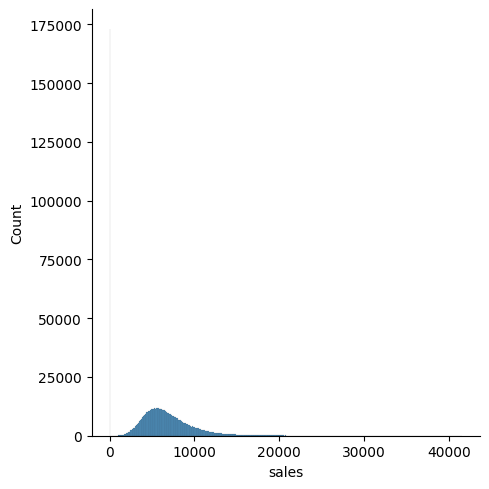

In [23]:
sns.displot(df_1['sales'])

Agora analisando a **competition_distance** vemos que o minimo é 20, que significa que o concorrente mais próximo está a 20 metros. A skew tá em 10 que é um valor muito alto, está muito deslocada para a esquerda (positivo) e uma kurtosis gigantesca, aqui já conseguimos concluir que é um distribuição de dados que tem um pico muito alto depois vai caindo, que significa que tem uma concentração de valores muito alta no começo, muitos concorrentes próximos, a distância entre as lojas concorrentes é pequena.

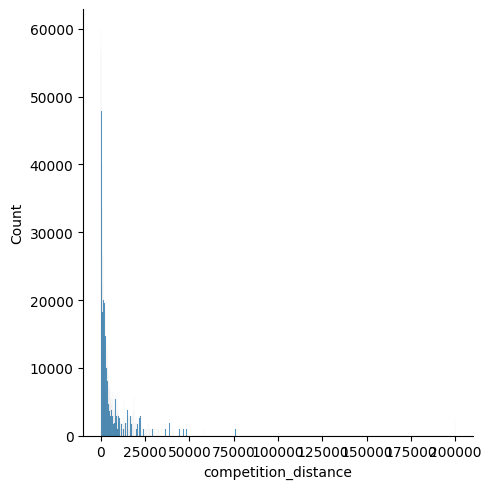

In [111]:
sns.displot(df_1['competition_distance'])

Na variável **customers** que é o número de clientes em um determinado dia, se vemos a média e o desvio padrão conseguimos concluir que as vezes temos dias que tiveram 1000 clientes e as vezes 200 clientes, tirando assim uma média de una 600 clientes por dia.

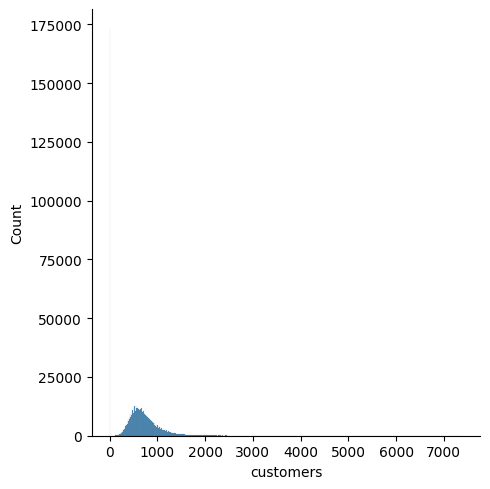

In [113]:
sns.displot(df_1['customers'])

#### Análise Variáveis categoricas

**State_holiday** - indica um feriado estadual. Normalmente, todas as lojas, com poucas exceções, estão fechadas em feriados estaduais. Note que todas as escolas estão fechadas em feriados e fins de semana. a = feriado, b = feriado de Páscoa, c = Natal, 0 = Nenhum.

**store_type** - diferencia entre 4 modelos de lojas diferentes: a, b, c, d.

**assortment** - descreve um nível de sortimento: a = básico, b = extra, c = estendido.

In [115]:
atributos_categoricos.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<Axes: xlabel='state_holiday', ylabel='sales'>

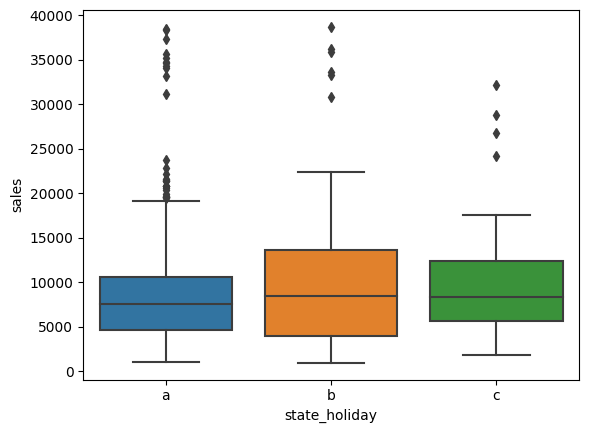

In [126]:
# Tirar os dias que não tiveram venda porque a loja estava fechada e somente vendas acima de 0.
aux_1 = df_1[(df_1['state_holiday']!= '0') & (df_1['sales'] > 0)]
sns.boxplot(x='state_holiday', y='sales', data=aux_1)

<Axes: xlabel='store_type', ylabel='sales'>

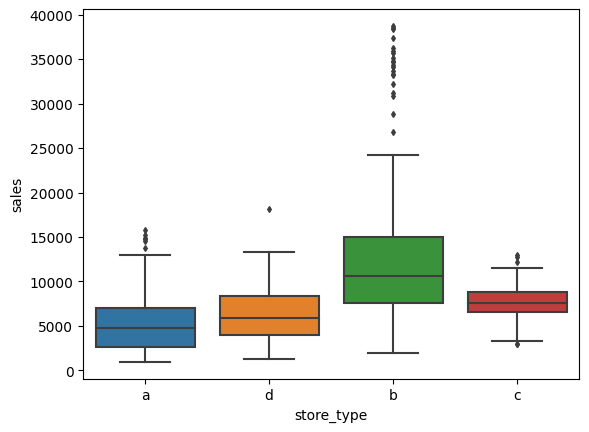

In [138]:
sns.boxplot(x='store_type', y='sales', data=aux_1, fliersize=3)

<Axes: xlabel='assortment', ylabel='sales'>

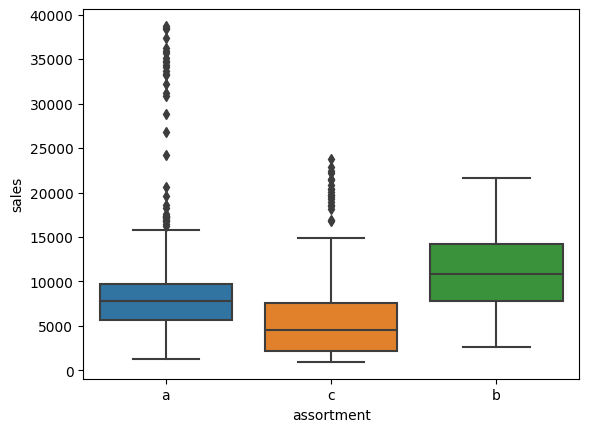

In [128]:
sns.boxplot(x='assortment', y='sales', data=aux_1)

# PASSO 02 - ENGENHARIA DE RECURSOS

<img src='img\mapa_mental_vendas.png'>

## Criação de Hipóteses

Aqui são suposições que eu tiro, palpites/hipóteses, podem ser verdadeiras ou não, vou utilizar os dados para confirmar essas hipóteses baseadas no mapa mental que fiz anteriormente. Geralmente esse mapa mental e as hipóteses vem de um reunião de brainstorm com os times envolvidos no projeto ou sozinho. As hipóteses são importantes para conseguir encontrar um correlação de uma coisa coma outra, não tem a ver com causa e efeito, ou seja, não significa que aumentar algo que um hipótese confirmou aumentará os lucros. O que precisamos fazer é mapear todos os atributos que impactam nas vendas.

### Hipóteses Lojas

    1 - Lojas com maior quantidade de funcionários deveria vender mais: Nesse dataset não consta números de funcionários, não tem como validar;
    
    2 - Lojas com maior capacidade de estoque deveriam vender mais: Não tenho a informação de estoque, não tem como validar;
    
    3- Lojas com maior porte deveriam vender mais: Não tenho informação do porte da loja, não tem como validar;
    
    4 - Lojas com maior sortimento(variedades de produto) deveriam vender mais: Tenho essa informação no dataset, vou usar na lista final.
    
    5 - Lojas com concorrentes mais perto deveriam vender menos: Tenho essa informação no dataset vou usar na lista final de hipóteses;
    
    6 - Lojas com concorrentes a mais tempo deveriam vender mais: Tenho essa informação no dataset vou usar na lista final de hipóteses;

### Hipóteses Produto

    1 - Lojas que tem mais marketing deveriam vender mais: Não tenho a informação de estoque, não tem como validar;
    
    2 - Lojas que expões mais os produtos na vitrine deveriam vender mais: Não tenho a informação de estoque, não tem como validar;
    
    3 - Lojas que tem preços menores(promoção) nos produtos deveriam vender mais;
    
    4 - Lojas com preços menores(promoção) nos produtos por mais tempo deveriam vender mais: Tenho essa informação no dataset vou usar na lista final de hipóteses;
    
    5 - Lojas com promoções por mais dias consecutivos deveriam vender mais: Tenho essa informação no dataset vou usar na lista final de hipóteses;
    
    6 - Lojas com mais promoções consecutivas deveriam vender mais: Tenho essa informação no dataset vou usar na lista final de hipóteses;
   

### Hipóteses Tempo (Sazonalidade)

    1 - Lojas abertas em feriados de natal deveriam vender mais: tem como avaliar isso no dataset;
    
    2 - Lojas deveriam vender mais ao longos dos anos: consigo avaliar isso no dataset;
    
    3 - Lojas deveriam vender mais no segundo semestre do ano: consigo avaliar isso no dataset;
    
    4 - Lojas deveriam vender mais após o dia 10 de cada mês: Consigo avaliar também;
    
    5 - Lojas deveriam vender menos aos finais de semana: consigo avaliar;
    
    6 - Lojas deveriam vender menos durante os feriados escolares.
    
    7 - Lojas que que abrem menos nos feriados deveriam vender menos:
    
    8 - Lojas que abrem nos primeiros seis meses deveriam vender mais;
    
    9 - Lojas que abrem nos finais de semana deveriam vender mais.

### Lista final de Hipóteses

**Hipóteses de produto**
    
    1 - Lojas com maior sortimento(variedades de produto) deveriam vender mais: Tenho essa informação no dataset, vou usar na lista final.
    2 - Lojas com concorrentes mais perto deveriam vender menos: Tenho essa informação no dataset vou usar na lista final de hipóteses;
    3 - Lojas com concorrentes a mais tempo deveriam vender mais: Tenho essa informação no dataset vou usar na lista final de hipóteses;

**Hipóteses de Lojas**

    1 - Lojas com preços menores(promoção) nos produtos por mais tempo deveriam vender mais;
    2 - Lojas com promoções por mais dias consecutivos deveriam vender mais;
    3 - Lojas com mais promoções consecutivas deveriam vender mais;

**Hipóteses Tempo**

    1 - Lojas abertas em feriados de natal deveriam vender mais;
    2 - Lojas deveriam vender mais ao longos dos anos;
    3 - Lojas deveriam vender mais no segundo semestre do ano;
    4 - Lojas deveriam vender mais após o dia 10 de cada mês;
    5 - Lojas deveriam vender menos aos finais de semana;
    6 - Lojas deveriam vender menos durante os feriados escolares.

## Feature Engineering

In [82]:
# Copiando o df para essa sessão.
df_2 = df_1.copy()

Executar todo o código desse bloco de uma vez só

In [83]:
# Derivação da variável 'Date'
# year
df_2['year']= df_2['date'].dt.year

# mounth
df_2['month']= df_2['date'].dt.month

# day
df_2['day']= df_2['date'].dt.day

# week of year
df_2['week_of_year']= df_2['date'].dt.isocalendar().week

# year week
df_2['year_week']= df_2['date'].dt.strftime('%Y-%W')


# Derivação das variáveis 'competition'
# competition_since -> Desde a data da compra até quando a concorrência começou
# A variável competition_open_since está separada em duas colunas, preciso juntar em uma coluna e depois subtraí o que preciso.
df_2['competition_open_since_year'] = df_2['competition_open_since_year'].astype(int)
df_2['competition_open_since_month'] = df_2['competition_open_since_month'].astype(int)

df_2['competition_since'] = df_2.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'], month=x['competition_open_since_month'], day=1), axis=1)
df_2['competition_time_month'] = ((df_2['date'] - df_2['competition_since'])/30).apply(lambda x: x.days).astype(int)

"""
Esse bloco começou a da erro do nada, estava funcionando normalmente ontem
# Derivação das variáveis 'promo'
# promo_since -> Desde quando tenho a promoção ativa.
# Aqui o problema que temos duas variais promo2_since que pega o ano e a semana, não temos o mês, ai precisamos fazer alguns ajustes.
df_2['promo_since'] = df_2['promo2_since_year'].astype(str) + '-' + df_2['promo2_since_week'].astype(str)
df_2['promo_since'] = df_2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - pd.Timedelta(days=7))

# Tempo que a promoção está ativa em semanas
df_2['promo_time_week'] = ((df_2['date'] - df_2['promo_since'])/7).apply(lambda x: x.days).astype(int) # Extrair os dias do resultado
"""


# Assortment -> Nível da variedades de produtos
df_2['assortment'] = df_2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else ' extended')


# State Holiday -> Feriados
df_2['state_holiday'] = df_2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else  'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')

df_2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


### Derivação da variável 'date'

In [69]:
# year
df_2['year']= df_2['date'].dt.year

# mounth
df_2['month']= df_2['date'].dt.month

# day
df_2['day']= df_2['date'].dt.day

# week of year
df_2['week_of_year']= df_2['date'].dt.isocalendar().week

# year week
df_2['year_week']= df_2['date'].dt.strftime('%Y-%W')

df_2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,0,0,0,0,0
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


### Derivação da variáveis 'competition'

In [29]:
# competition_since -> Desde a data da compra até quando a concorrência começou
# A variável competition_open_since está separada em duas colunas, preciso juntar em uma coluna e depois subtraí o que preciso.
df_2['competition_open_since_year'] = df_2['competition_open_since_year'].astype(int)
df_2['competition_open_since_month'] = df_2['competition_open_since_month'].astype(int)

df_2['competition_since'] = df_2.apply(lambda x: datetime(year=x['competition_open_since_year'], month=x['competition_open_since_month'], day=1), axis=1)
df_2['competition_time_month'] = ((df_2['date'] - df_2['competition_since'])/30).apply(lambda x: x.days).astype(int)

### Derivação das variáveis 'promo'

In [ ]:
# promo_since -> Desde quando tenho a promoção ativa.
# Aqui o problema que temos duas variais promo2_since que pega o ano e a semana, não temos o mês, ai precisamos fazer alguns ajustes.
df_2['promo_since'] = df_2['promo2_since_year'].astype(str) + '-' + df_2['promo2_since_week'].astype(str)
df_2['promo_since'] = df_2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - pd.Timedelta(days=7))

# Tempo que a promoção está ativa em semanas
df_2['promo_time_week'] = ((df_2['date'] - df_2['promo_since'])/7).apply(lambda x: x.days).astype(int) # Extrair os dias do resultado

### Sobrescrevendo a variável 'assortment'

In [45]:
# Assortment -> Nível da variedades de produtos
df_2['assortment'] = df_2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else ' extended')

### Sobrescrevendo a variável 'state_holiday'

In [47]:
# State Holiday -> Feriados
df_2['state_holiday'] = df_2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else  'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')